# GDELT 

They have raw files (1Gb total, approx 10Mb per each month of data) here:
http://www.gdeltproject.org/data.html#rawdatafiles

and an SQL form here:
http://www.gdeltproject.org/data.html#googlebigquery

Raw files are a bit cumbersome to work on. SQL queries are more handy for finding something we are interested in.

In [2]:
import numpy as np
%matplotlib inline  
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# read one month of data
gdelt=pd.read_csv('20130828.export.CSV',sep='\t',header=None)

# read header
header=pd.read_csv('CSV.header.dailyupdates.txt', sep='\t')

# assign header
gdelt.columns = header.columns
gdelt.columns

/Users/mattia/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8,9,10,11,12,13,14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'GLOBALEVENTID', u'SQLDATE', u'MonthYear', u'Year', u'FractionDate',
       u'Actor1Code', u'Actor1Name', u'Actor1CountryCode',
       u'Actor1KnownGroupCode', u'Actor1EthnicCode', u'Actor1Religion1Code',
       u'Actor1Religion2Code', u'Actor1Type1Code', u'Actor1Type2Code',
       u'Actor1Type3Code', u'Actor2Code', u'Actor2Name', u'Actor2CountryCode',
       u'Actor2KnownGroupCode', u'Actor2EthnicCode', u'Actor2Religion1Code',
       u'Actor2Religion2Code', u'Actor2Type1Code', u'Actor2Type2Code',
       u'Actor2Type3Code', u'IsRootEvent', u'EventCode', u'EventBaseCode',
       u'EventRootCode', u'QuadClass', u'GoldsteinScale', u'NumMentions',
       u'NumSources', u'NumArticles', u'AvgTone', u'Actor1Geo_Type',
       u'Actor1Geo_FullName', u'Actor1Geo_CountryCode', u'Actor1Geo_ADM1Code',
       u'Actor1Geo_Lat', u'Actor1Geo_Long', u'Actor1Geo_FeatureID',
       u'Actor2Geo_Type', u'Actor2Geo_FullName', u'Actor2Geo_CountryCode',
       u'Actor2Geo_ADM1Code', u'Actor2Geo_Lat', u

In [22]:
gdelt.head(5)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,264896801,20030831,200308,2003,2003.6603,NaN,NaN,NaN,NaN,NaN,...,-2532413,4,"Uppsala, Uppsala Lan, Sweden",SW,SW21,59.8500,17.6333,-2532413,20130828,http://www.ngrguardiannews.com/science/131231-...
1,264896802,20030831,200308,2003,2003.6603,NaN,NaN,NaN,NaN,NaN,...,CA,2,"California, United States",US,USCA,36.1700,-119.7460,CA,20130828,http://money.msn.com/business-news/article.asp...
2,264896803,20030831,200308,2003,2003.6603,NaN,NaN,NaN,NaN,NaN,...,IN,1,Japan,JA,JA,36.0000,138.0000,JA,20130828,http://www.alaskadispatch.com/article/20130828...
3,264896804,20030831,200308,2003,2003.6603,NaN,NaN,NaN,NaN,NaN,...,JA,1,Japan,JA,JA,36.0000,138.0000,JA,20130828,http://www.alaskadispatch.com/article/20130828...
4,264896805,20030831,200308,2003,2003.6603,AFG,AFGHANISTAN,AFG,NaN,NaN,...,6273512,4,"Shahzada, Khowst, Afghanistan",AF,AF37,33.2942,70.1928,6273512,20130828,http://www.bakhtarnews.com.af/eng/politics/ite...


In [27]:
# This includes countries
gdelt.Actor1Geo_CountryCode.value_counts()

US    54384
SY     9798
UK     6094
RS     3918
CH     3639
IR     3067
AS     2989
IS     2970
IN     2885
CA     2810
PK     2748
NI     1973
IZ     1962
AF     1942
EG     1884
FR     1845
RP     1518
JA     1374
SF     1360
GM     1194
TU     1173
MY      957
JO      940
EI      933
KN      905
SA      791
ID      774
KS      771
KE      742
NZ      739
      ...  
SI        8
LU        8
DO        7
MC        7
LS        7
KT        7
UV        6
CV        6
WI        6
MJ        5
SC        4
MN        4
RE        4
PC        4
YI        4
AV        3
CW        3
PU        3
AY        3
GK        3
TN        2
VT        2
MB        2
GJ        2
FP        2
NH        2
AQ        2
SV        1
AC        1
PG        1
Name: Actor1Geo_CountryCode, dtype: int64

In [8]:
# events in somalia
len(gdelt[gdelt.Actor1Geo_CountryCode == 'SO'])

392

# SQL QUERY: Finding events per month in a country

I query the database to obtain, per each month, the number of events happening in one country (i.e. Somalia)

This is the SQL query:

In [ ]:
# SELECT MonthYear, Actor1CountryCode, Count FROM (
# SELECT Actor1CountryCode, MonthYear, COUNT(*) Count, RANK() OVER(PARTITION BY MonthYear ORDER BY Count DESC) rank
# FROM 
# (SELECT Actor1CountryCode, MonthYear FROM [gdelt-bq:full.events] WHERE Actor1CountryCode == 'SOM'),  
# GROUP EACH BY 1,2
# )
# WHERE MonthYear > 201001
# ORDER BY MonthYear

... and I export it as a csv file.
I plot the number of events in Somalia per month from 2010 to now.

In [10]:
SOM = pd.read_csv('results-20160321-160843.csv')
SOM.head()

,MonthYear,Actor1CountryCode,Count
0,201002,SOM,4156
1,201003,SOM,2339
2,201004,SOM,2959
3,201005,SOM,3066
4,201006,SOM,1755


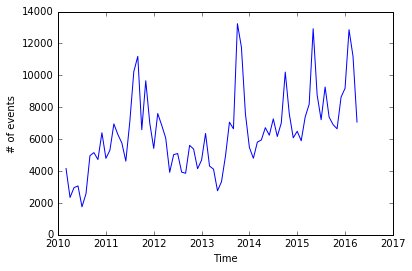

In [11]:
SOM.index = pd.to_datetime(SOM.MonthYear, format='%Y%m')
SOM.index = [float(str(i)[0:4])+float(str(i)[4:8])/12 for i in SOM.MonthYear] # just to make months
SOM.Count.plot()
locs,labels = plt.xticks()
plt.xticks(locs, map(lambda x: "%g" % x, locs))
plt.ylabel('# of events')
plt.xlabel('Time')